In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import oneshot as sm
import rfm, skipRFM, deepSkip, localSkip_2_2, localDeepSkip_8_1, localDeepSkip_2_2, localSkip_8_1, localSkip
# import parallel_euler as arch1
import torch
from torch import nn
import ks, l63, l96, ks_torch, ks0, ks1
import config

**Do V and KT match on small KS? (Yes they do)** 

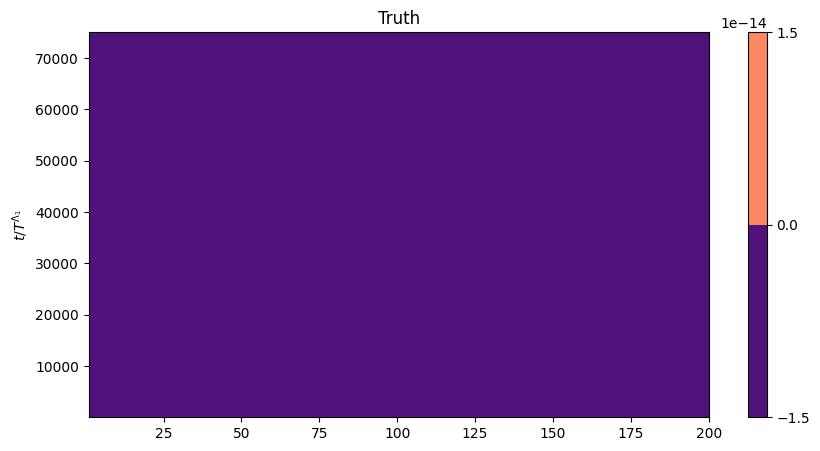

In [321]:
L, dt, N = 10, 0.25, 200
tau = {'error_threshold' : 0.25, 'dt': dt, 'Lyapunov_time': 1}
dns  = ks.KS(L=L, dt=dt, N=N, tend=75000)
dns.simulate()
uu = ks0.ks(L=L, dt=dt, N=N, tmax=75000)
ut.waterfall(uu-dns.uu, **tau)

**Look at the covariance structure**

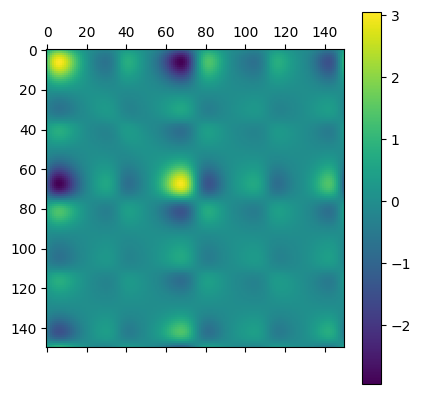

In [136]:
im = plt.matshow(np.cov(uu))
plt.colorbar(im)

**Try SkipRFM**

Time taken by gen_data is 8.8668 seconds


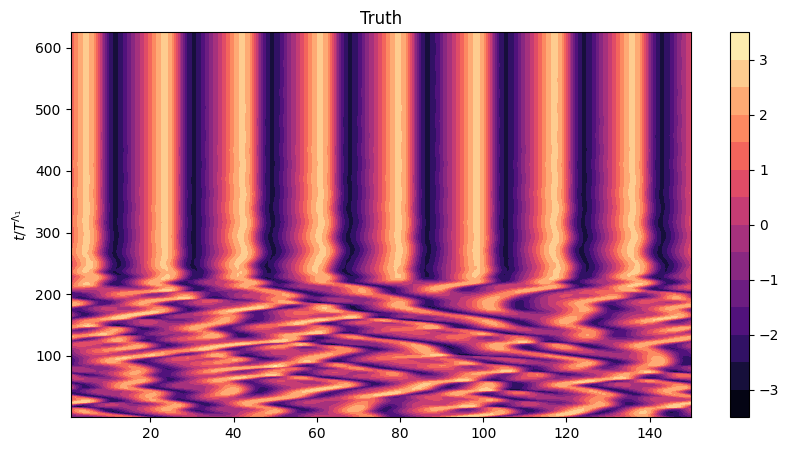

tensor([0.0000, 6.0000, 9.9346, 0.2100])


In [316]:
train, test = ks.gen_data(L=L, N=N, train_size=int(1e5), test_num=100)
train, test = torch.tensor(train), torch.tensor(test)
ut.waterfall(train[:, :2500], **tau)
L0, L1 = 0.4, 3.5
D, D_r, B = N, 512, 1
beta = 0.1
data_folder = '../data'
drf_args = [D_r, B, L0, L1, train, beta, 'SkipRFM', f'{data_folder}/SkipKS-small', False]
batch = skipRFM.BatchDeepRF(train, test, *drf_args)
batch.drf.learn(train, 42)
print(batch.get_tau_f(batch.drf, train, error_threshold=0.25, dt=1, Lyapunov_time=1))

**Shape of the attractor**

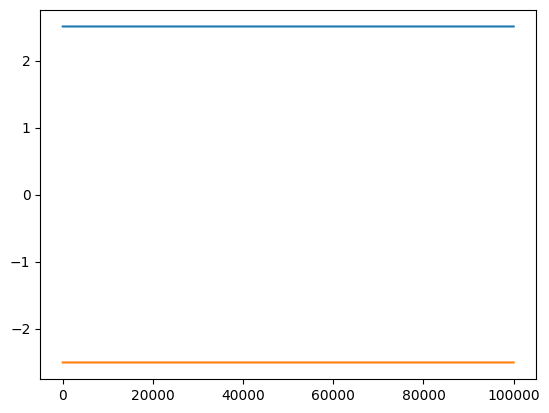

In [76]:
plt.plot(torch.max(train, dim=0)[0])
plt.plot(torch.min(train, dim=0)[0])

**Try LocalSkip**

In [232]:
drf_args = [512, 1, L0, L1, train, 1, 'LocalSkip', f'{data_folder}/LocalSkipKS-small', False, 5, 2]
drf = localSkip.DeepRF(*drf_args)
drf.learn(train, 42)
print(drf.compute_tau_f(test[:10], error_threshold=.25, dt=1, Lyapunov_time=1))

Time taken by compute_tau_f is 0.4586 seconds
(tensor([14., 22., 16., 11., 21., 16., 20., 11., 21., 16.]), tensor([14., 21., 16., 11., 21., 16., 20., 11., 20., 17.]), tensor([[0.0000e+00, 7.7858e-04, 2.9997e-03,  ..., 2.6314e+06, 2.6392e+06,
         2.6470e+06],
        [0.0000e+00, 1.2088e-03, 5.1048e-03,  ..., 3.5112e+06, 3.5179e+06,
         3.5246e+06],
        [0.0000e+00, 1.4373e-03, 4.8425e-03,  ..., 2.8351e+06, 2.8438e+06,
         2.8525e+06],
        ...,
        [0.0000e+00, 1.0412e-03, 4.3401e-03,  ..., 3.1095e+06, 3.1176e+06,
         3.1256e+06],
        [0.0000e+00, 1.3281e-03, 5.5166e-03,  ..., 3.1414e+06, 3.1473e+06,
         3.1533e+06],
        [0.0000e+00, 1.7900e-03, 6.0814e-03,  ..., 3.4792e+06, 3.4914e+06,
         3.5037e+06]]), tensor([[0.0000e+00, 7.4728e-04, 2.8755e-03,  ..., 2.7268e+06, 2.7654e+06,
         2.7980e+06],
        [0.0000e+00, 1.2382e-03, 5.2479e-03,  ..., 3.3844e+06, 3.3877e+06,
         3.4022e+06],
        [0.0000e+00, 1.3891e-03, 4.6510e-0

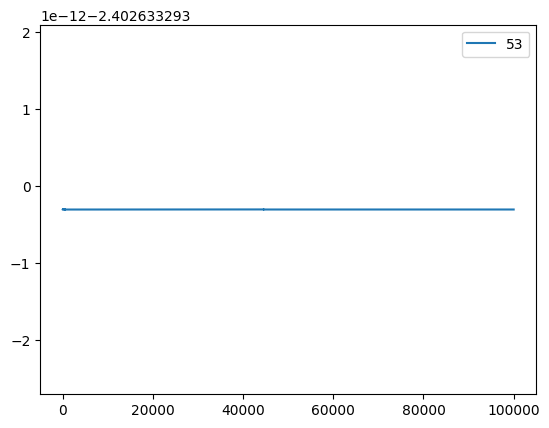

In [105]:
i = np.random.randint(N)
plt.plot(train[i, :], label=f'{i}')
plt.legend()

In [104]:
train.shape, uu.shape

(torch.Size([64, 100000]), (64, 20001))

In [107]:
train[53, 60000:60000+100]

tensor([-2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026, -2.4026,
        -2.4026, -2.4026, -2.4026, -2.40

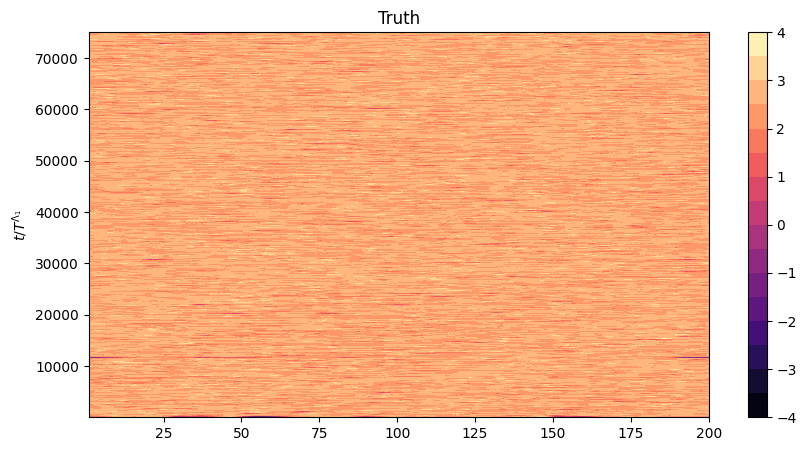

In [323]:
ut.waterfall(dns.uu[:, :], **tau)

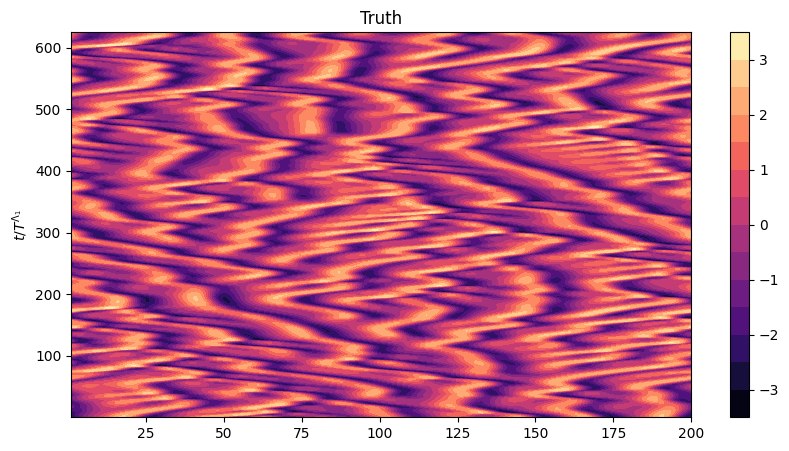

In [141]:
uu[:, :2000].std(axis=1)

array([0.10662058, 0.11198436, 0.11741712, 0.12281506, 0.12828284,
       0.13412604, 0.14078893, 0.1487344 , 0.15828944, 0.16950868,
       0.18210982, 0.19549951, 0.2088657 , 0.22129546, 0.23188661,
       0.23983928, 0.2445269 , 0.24555308, 0.24280497, 0.23651625,
       0.22735329, 0.21653   , 0.20592146, 0.19805195, 0.19569399,
       0.20088616, 0.21381027, 0.23248548, 0.25345434, 0.27268224,
       0.28615502, 0.29023548, 0.28196477, 0.25938575, 0.22186148,
       0.17030793, 0.10724907, 0.03662878, 0.03662878, 0.10724907,
       0.17030793, 0.22186148, 0.25938575, 0.28196477, 0.29023548,
       0.28615502, 0.27268224, 0.25345434, 0.23248548, 0.21381027,
       0.20088616, 0.19569399, 0.19805195, 0.20592146, 0.21653   ,
       0.22735329, 0.23651625, 0.24280497, 0.24555308, 0.2445269 ,
       0.23983928, 0.23188661, 0.22129546, 0.2088657 , 0.19549951,
       0.18210982, 0.16950868, 0.15828944, 0.1487344 , 0.14078893,
       0.13412604, 0.12828284, 0.12281506, 0.11741712, 0.11198